In [33]:
%cd /home/gianscarpe/dev/event-camera/src

/home/gianscarpe/dev/event-camera/src


In [156]:
ls /home/gianscarpe/dev/exps/voxelgrid/exps_AutoEncoderEstimator/exp_resnet34_cut_256_$Adam_0.0003_no_aug_08-12-08-32/

ls: cannot access '/home/gianscarpe/dev/exps/voxelgrid/exps_AutoEncoderEstimator/exp_resnet34_cut_256_.0003_no_aug_08-12-08-32/': No such file or directory


In [158]:
import experimenting.agents as agents
import pytorch_lightning as pl
import os
import torch
from albumentations import Compose, CenterCrop
from albumentations.pytorch import ToTensor
from importlib import reload  
from experimenting.dataset.core import DHP19Core

exp_name = 'voxelgrid/exps_AutoEncoderEstimator/exp_resnet34_cut_256_$Adam_0.0003_no_aug_08-12-08-32/'
checkpoint_dir = f'/home/gianscarpe/dev/exps/{exp_name}/checkpoints'
checkpoints = sorted(os.listdir(checkpoint_dir))
checkpoint_path = os.path.join(checkpoint_dir, checkpoints[0])



In [159]:
print(checkpoint_path)

/home/gianscarpe/dev/exps/voxelgrid/exps_AutoEncoderEstimator/exp_resnet34_cut_256_$Adam_0.0003_no_aug_08-12-08-32//checkpoints/epoch=07-val_loss=0.00.ckpt


In [160]:
fmodel = agents.AutoEncoderEstimator.load_from_checkpoint(checkpoint_path)

In [161]:
path = '/data/gscarpellini/nturgb+d_rgb_s018/nturgb+d_rgb/S018C001P044R001A107_rgb/part_0'

In [162]:
path = '/data/gscarpellini/dhp19/voxel_grid_dataset/movements_per_frame'

In [163]:
import numpy as np

In [185]:
def plot_voxel(images, titles):
    voxel_depth = 4
    fig, axs = plt.subplots(nrows=len(images), ncols=voxel_depth, figsize=(voxel_depth*5,10))
    for row in range(len(images)):
        for col in range(voxel_depth):
            plt.sca(axs[row, col])
            plt.axis('off')
            plt.imshow((images[row].squeeze())[col])
            plt.title(f'{titles[row]}_V{col}')

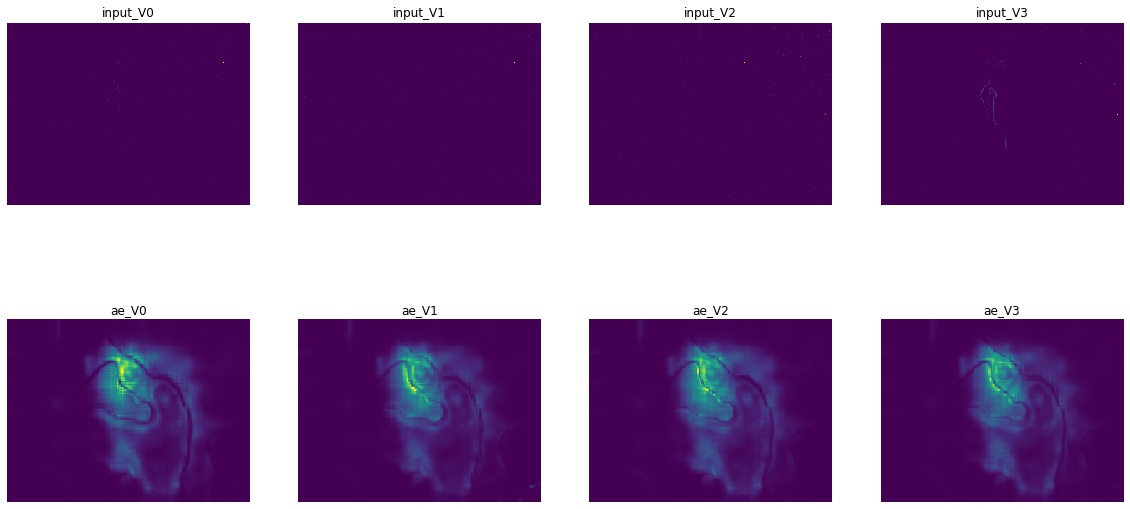

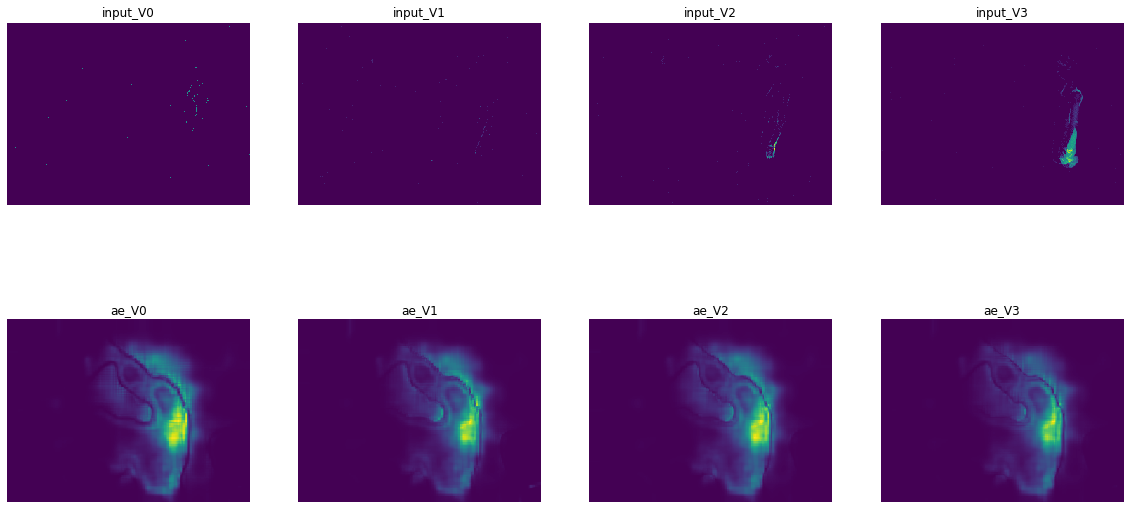

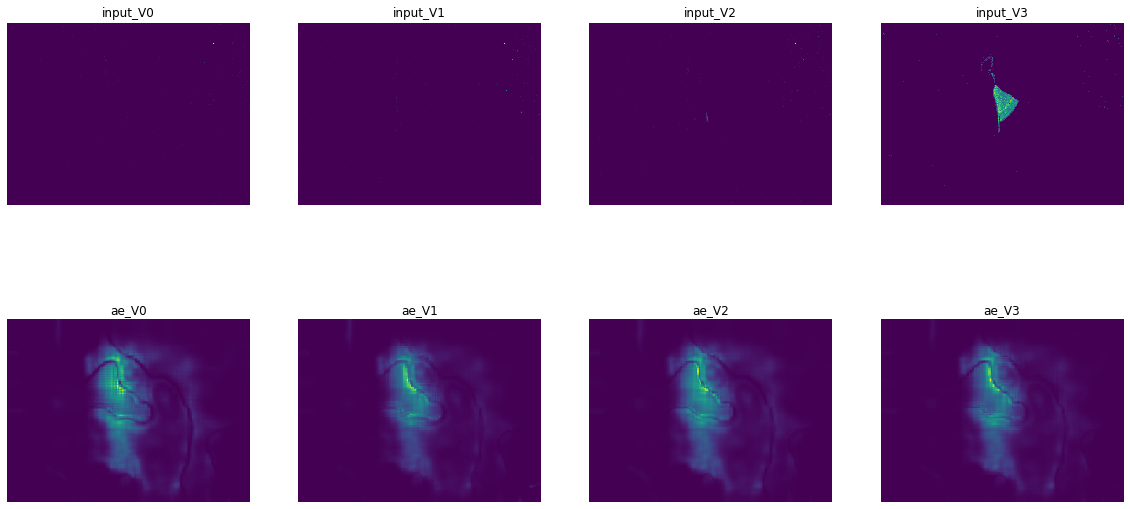

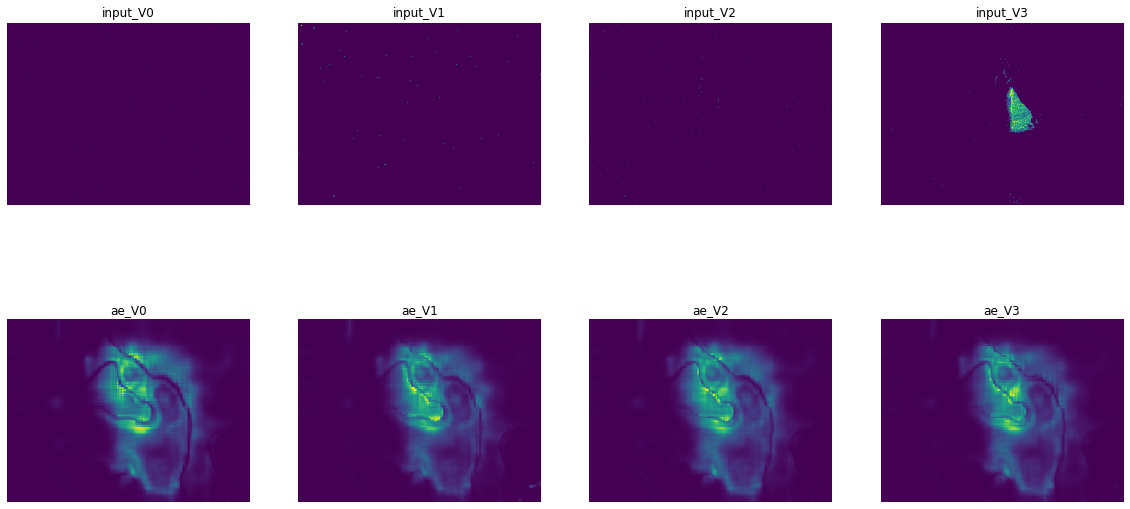

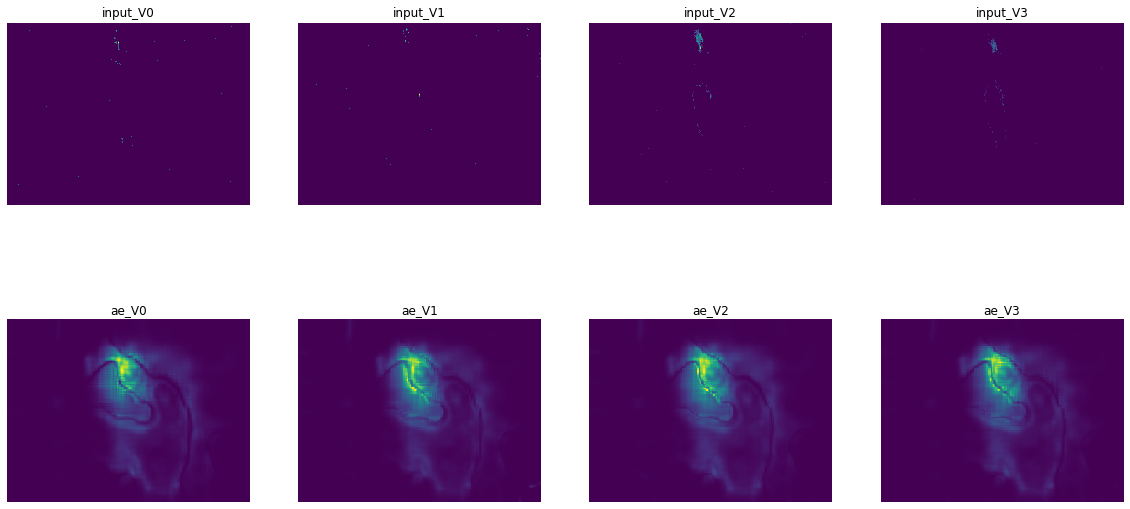

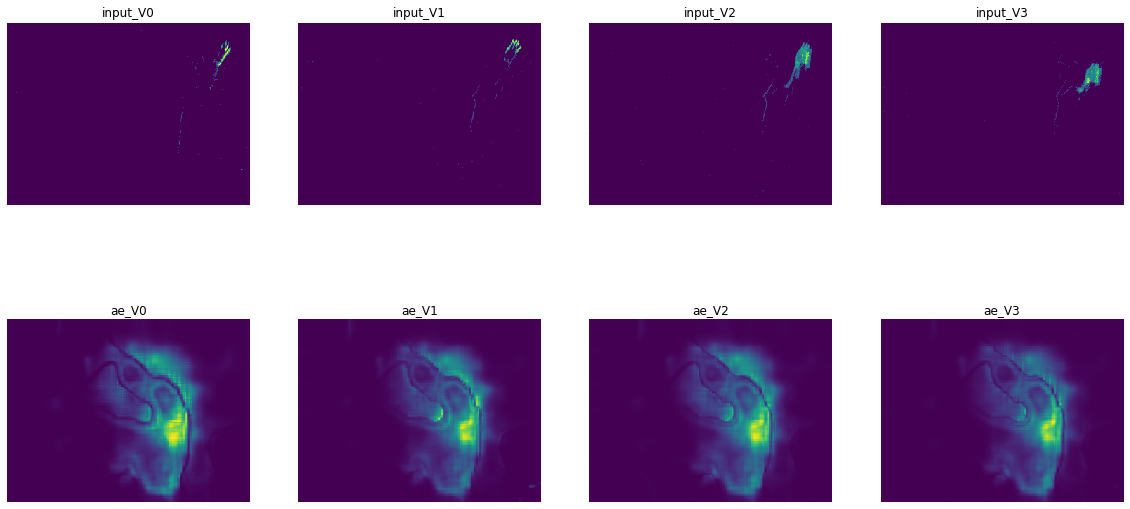

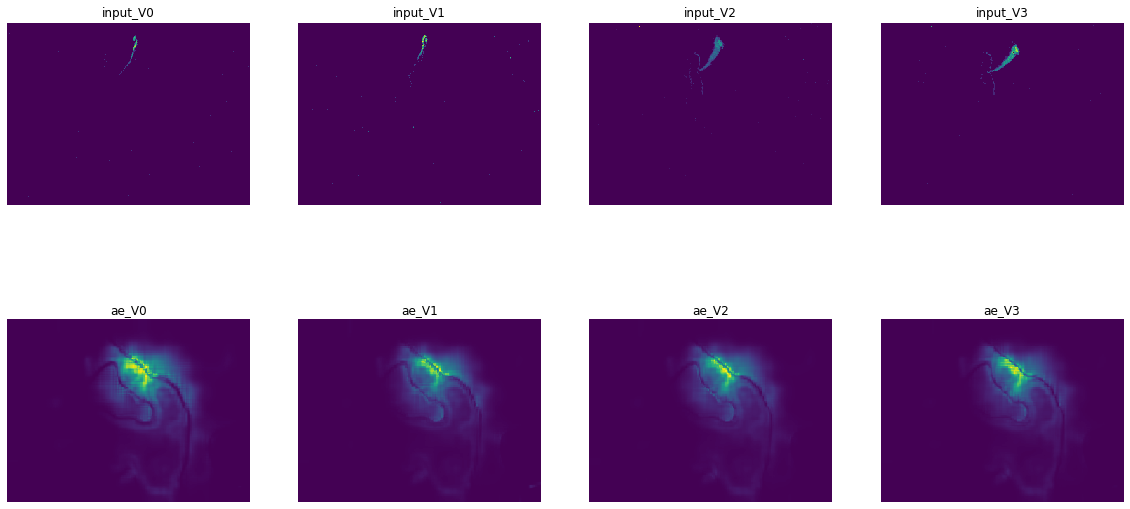

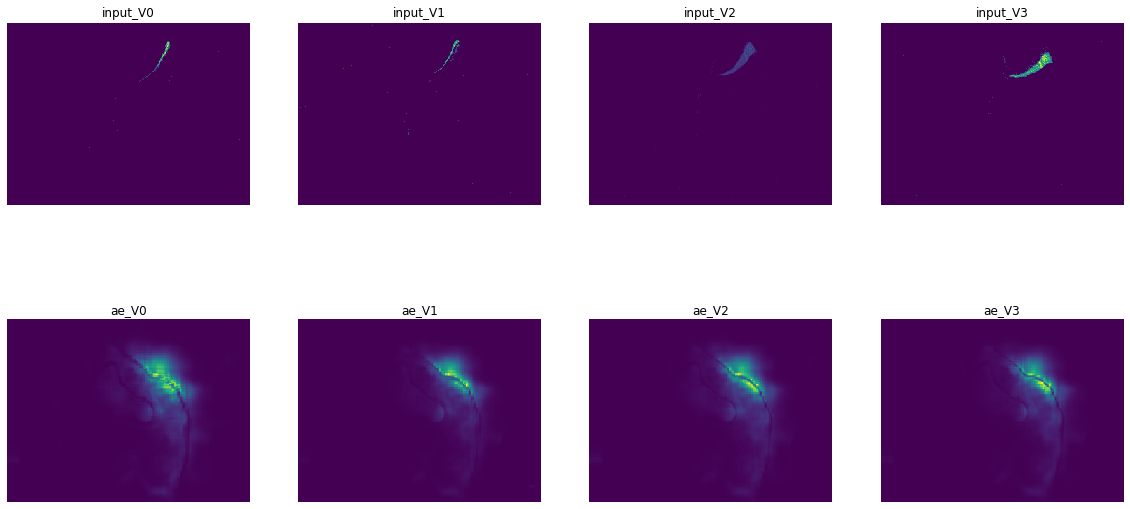

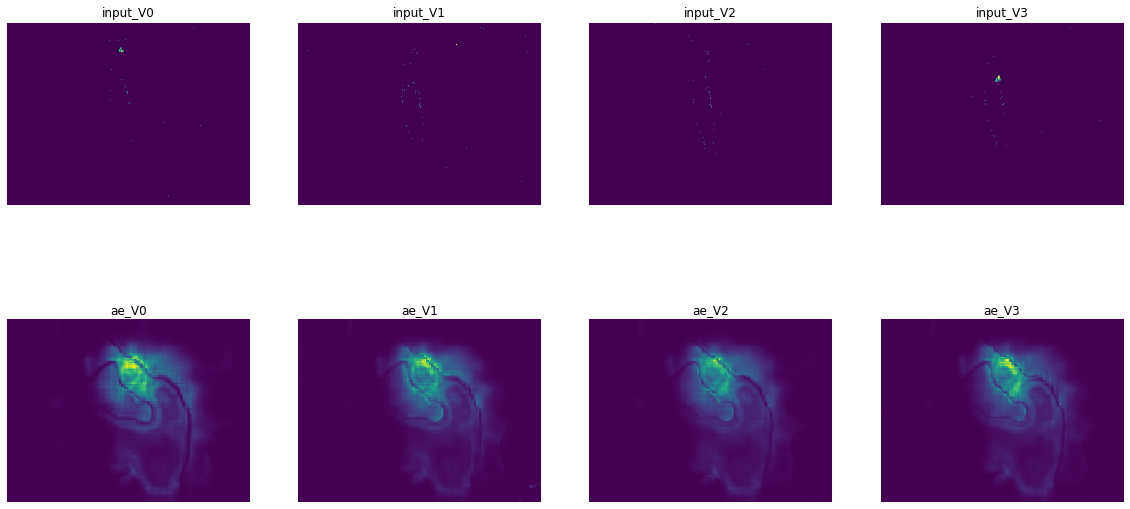

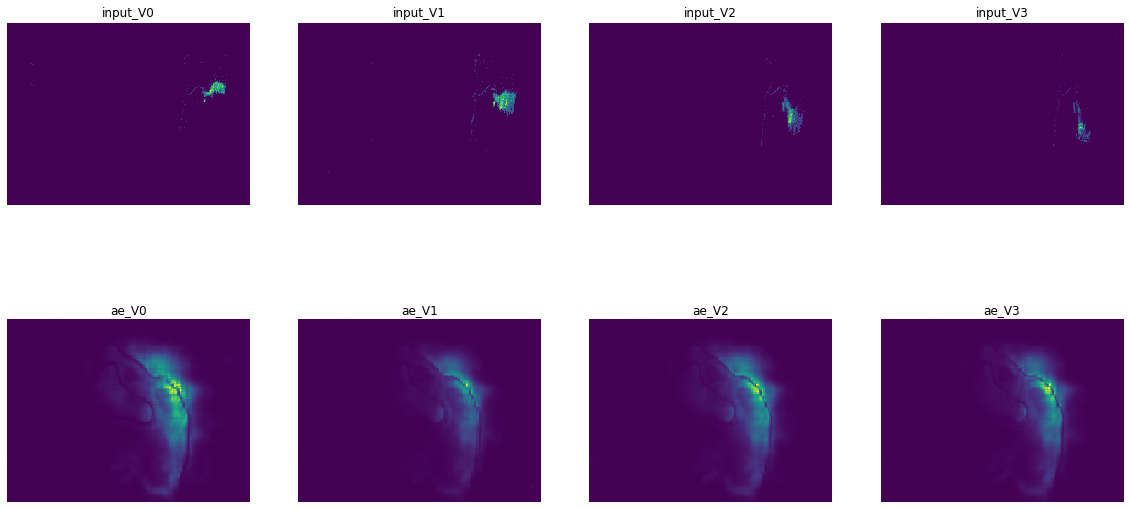

In [186]:
with torch.no_grad():
    count = 0
    for im in sorted(os.listdir(path)):
        if "S1_" not in im:
            continue
        count+=1
        if count > 10:
            break
        x = torch.Tensor(DHP19Core.load_frame(os.path.join(path, im))).transpose(-1, 0).transpose(1, -1)
        x = x.unsqueeze(0)
        out = fmodel(x)
        plot_voxel([x, out], ['input', 'ae'])


In [141]:
from matplotlib import pyplot as plt

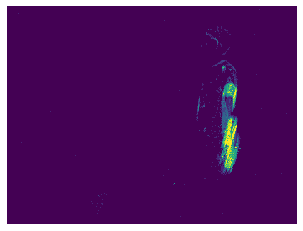

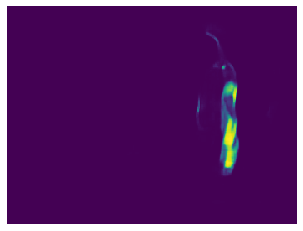

In [145]:
plt.axis('off')
plt.imshow(x.squeeze())
plt.figure()
plt.axis('off')
plt.imshow(out.squeeze())

In [47]:
torch.save(fmodel.model, 'ae_resnet34_cut_256_no_aug.pt')